In [22]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np

In [23]:
data = {"Name": ["no SIHFT",
                 "EDDI + CFCSS", "EDDI + RASM", "EDDI + inter-RASM", 
                 "FDSC + CFCSS", "FDSC + RASM", "FDSC + inter-RASM",
                 "sEDDI + CFCSS", "sEDDI + RASM", "sEDDI + inter-RASM"],
        "SDC": [0.625,
                0.017, 0.022, 0.015,
                1.208, 1.438, 1.775,
                0.023, 0.015, 0.013],
        "Size": [1,
                 3.37, 4.65, 8.75,
                 2.70, 3.16, 6.61,
                 3.40, 4.17, 8.01],
        "Slowdown": [1,
                     4.870, 5.711, 8.455,
                     2.847, 3.296, 4.793,
                     3.040, 3.523, 5.013]}

In [24]:
df = pd.DataFrame.from_dict(data=data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


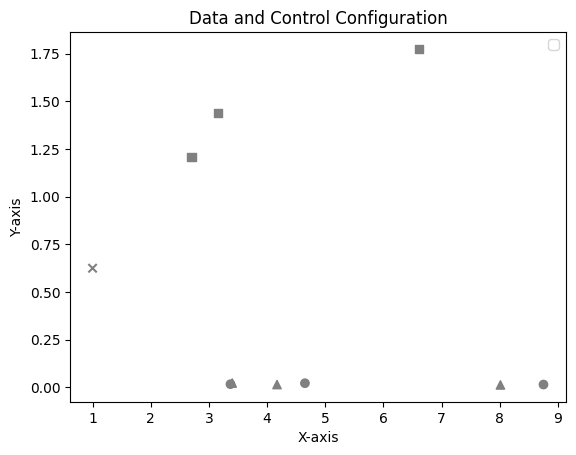

In [25]:
for name in data["Name"]:

    d = df[df["Name"] == name]
    if "sEDDI" in name:
        shape = "^"
    elif "EDDI" in name:
        shape = "o"
    elif "FDSC" in name: 
        shape = "s"
    else:
        shape = "x"
    
    if "inter-RASM" in name:
        color = "//"
    elif "RASM" in name:
        color = "xx"
    elif "CFCSS" in name:
        color = "++"
    else:
        color = "//"

    plt.scatter(
        d["Size"], d["SDC"],
        marker=shape,
        color="gray",  # Color is black for grayscale printing
        hatch=color,
    )

# Customize the plot as needed
plt.legend()
plt.title("Data and Control Configuration")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show the plot
plt.show()

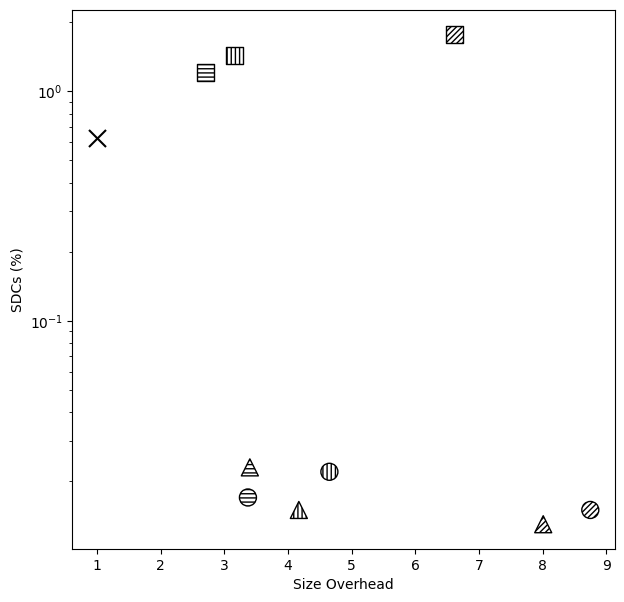

In [26]:
plt.figure(figsize=(7,7))
for name in data["Name"]:
    d = df[df["Name"] == name]
    if "sEDDI" in name:
        shape = "^"
    elif "EDDI" in name:
        shape = "o"
    elif "FDSC" in name: 
        shape = "s"
    else:
        shape = "x"
    
    if "inter-RASM" in name:
        color = "//////"
    elif "RASM" in name:
        color = "||||"
    elif "CFCSS" in name:
        color = "----"
    else:
        color = None

    if (color == None):
        plt.scatter(d["Size"], d["SDC"], hatch=color, marker=shape, s=150, c="black")
    else:
        plt.scatter(d["Size"], d["SDC"], hatch=color, marker=shape, s=150, c="white", edgecolors="black")
plt.xlabel("Size Overhead")
plt.ylabel("SDCs (%)")
plt.yscale("log")
plt.savefig("figures/tradeoff_size.pdf", format='pdf', bbox_inches = 'tight', dpi=400)


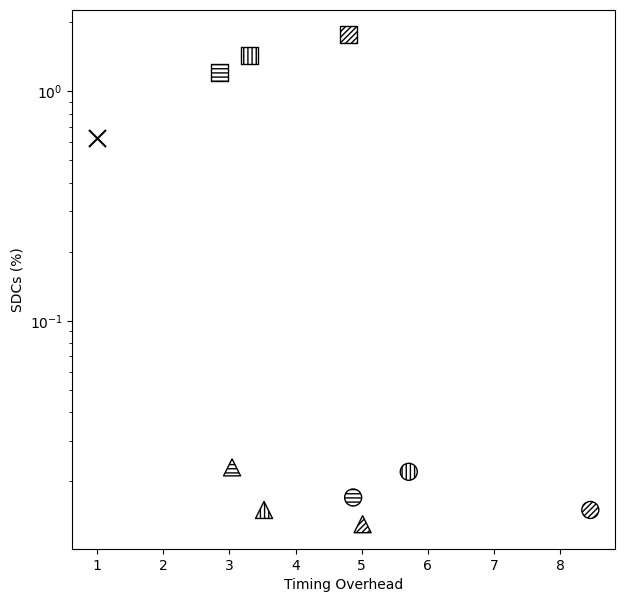

In [27]:
plt.figure(figsize=(7,7))
for name in data["Name"]:
    d = df[df["Name"] == name]
    if "sEDDI" in name:
        shape = "^"
    elif "EDDI" in name:
        shape = "o"
    elif "FDSC" in name: 
        shape = "s"
    else:
        shape = "x"
    
    if "inter-RASM" in name:
        color = "//////"
    elif "RASM" in name:
        color = "||||"
    elif "CFCSS" in name:
        color = "----"
    else:
        color = None
    if (color == None):
        plt.scatter(d["Slowdown"], d["SDC"], hatch=color, marker=shape, s=150, c="black", label=name)
    else:
        plt.scatter(d["Slowdown"], d["SDC"], hatch=color, marker=shape, s=150, c="white", edgecolors="black", label=name)
plt.xlabel("Timing Overhead")
plt.ylabel("SDCs (%)")
plt.yscale("log")
plt.savefig("figures/tradeoff_time.pdf", format='pdf', bbox_inches = 'tight', dpi=400)


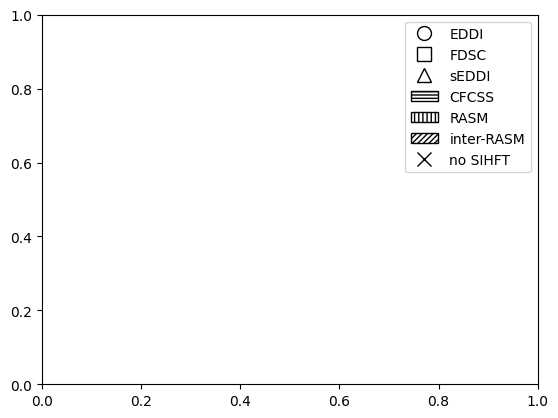

In [28]:
def export_legend(legend, filename="legend.pdf"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

legend_handles = []
legend_lables = ["EDDI", "FDSC", "sEDDI", "CFCSS", "RASM", "inter-RASM", "no SIHFT"]

legend_handles.append(Line2D([0], [0], color="white", markeredgecolor="black", label="EDDI", marker="o", linestyle='', markersize=10))
legend_handles.append(Line2D([0], [0], color="white", markeredgecolor="black", label="FDSC", marker="s", linestyle='', markersize=10))
legend_handles.append(Line2D([0], [0], color="white", markeredgecolor="black", label="sEDDI", marker="^", linestyle='', markersize=10))
legend_handles.append(Patch(facecolor="white", edgecolor="black", hatch="-----", label="CFCSS"))
legend_handles.append(Patch(facecolor="white", edgecolor="black", hatch="||||", label="RASM"))
legend_handles.append(Patch(facecolor="white", edgecolor="black", hatch="//////", label="inter-RASM"))
legend_handles.append(Line2D([0], [0], color="black", label="no SIHFT", marker="x",linestyle='', markersize=10))

export_legend(plt.legend(legend_handles, legend_lables))